In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from urllib import request
module_url = f"https://drive.google.com/uc?export=view&id=1Ayzzptr4xQmSGSahhzanAlAyw4HtrV0j"
module_name = 'cmt309_314_coursework1_marks.csv'
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))
df = pd.read_csv('cmt309_314_coursework1_marks.csv')

Fetching https://drive.google.com/uc?export=view&id=1Ayzzptr4xQmSGSahhzanAlAyw4HtrV0j


In [2]:
df.head(5)

,Number,Module,Q1.a,Q1.b,Q2,Q3,Total
0,c21066841,CMT309,20,17,30.0,15.0,82.0
1,c21079565,CMT309,18,20,29.5,16.0,83.5
2,c21096546,CMT309,15,11,18.0,14.0,58.0
3,c1721659,CMT309,2,0,2.0,5.0,9.0
4,c2099034,CMT309,0,0,0.0,0.0,0.0


In [3]:
# Find your mark
your_number = 'c21099797' # replace the empty string with your number 'c00000000'
df[df['Number'] == your_number]

,Number,Module,Q1.a,Q1.b,Q2,Q3,Total
19,c21099797,CMT309,0,0,25.0,5.0,30.0


In [4]:
# Create a dataframe for overall class statistics
df.loc[:,'Q1.a':].agg(['mean', 'median', 'std'])

,Q1.a,Q1.b,Q2,Q3,Total
mean,15.669604,14.149780,25.614537,17.916290,73.543040
median,18.000000,16.000000,28.000000,19.000000,79.000000
std,5.470039,6.322074,7.421573,7.560875,22.271063


In [5]:
# Distribution of studens based on Mark
d = {'Fail':[0, 50], 'Pass':[50, 60], 'Merit':[60, 70], 'Distinction':[70, 100.1]}
perf = pd.DataFrame({'Mark':['Fail', 'Pass', 'Merit', 'Distinction']})
perf['Num Students'] = 0
for key, value in d.items():
    perf.loc[perf['Mark'] == key,'Num Students'] = df[(df['Total']>=value[0])*(df['Total']<value[1])]['Total'].agg(['count']).values[0]
perf['Percentage'] = 100*perf['Num Students']/perf['Num Students'].sum()
perf

/Users/joydipb/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:177: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


,Mark,Num Students,Percentage
0,Fail,23,10.132159
1,Pass,9,3.964758
2,Merit,33,14.537445
3,Distinction,162,71.365639


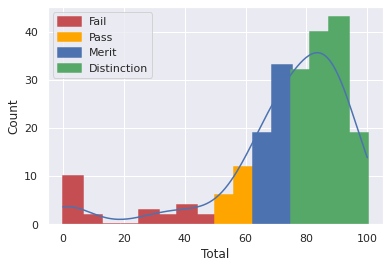

In [82]:
# Plot a histogram for total marks
sns.set(color_codes=True)
ax = sns.histplot(data=df, x="Total", linewidth=2.5, kde=True)
for p in ax.patches:
    if p.get_x() < 50:
        p.set_color('r')
        p.set_label('Fail')
    elif p.get_x() < 60:
        p.set_color('orange')
        p.set_label('Pass')
    elif p.get_x() < 70:
        p.set_color('b')
        p.set_label('Merit')
    else:
        p.set_color('g')
        p.set_label('Distinction')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())   

Text(0, 0.5, 'Total Mark')

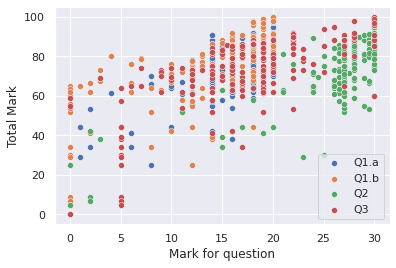

In [83]:
for col in ['Q1.a','Q1.b','Q2', 'Q3']: 
    sns.scatterplot(data=df, x=col, y='Total', label=col, palette='Set3')
plt.legend()
plt.xlabel('Mark for question')
plt.ylabel('Total Mark')

In [84]:
# Boxplot for each question
px.box(df, x=['Q1.a', 'Q1.b', 'Q2', 'Q3'], width=600, height=400, 
       labels={'value':'Mark for question', 'variable':'Question'}, template="simple_white", notched=True)